In [1]:
import pandas as pd


df=pd.read_csv('C:/Users/Lenovo/OneDrive/Bureau/Medical Visualization/Medical-Data-Visualizer/medical_examination.csv')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [3]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [4]:
df.duplicated().sum()

0

-------------------Visualizer----------------------------------------------

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)

In [7]:
df_long = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'alco', 'active', 'smoke'])


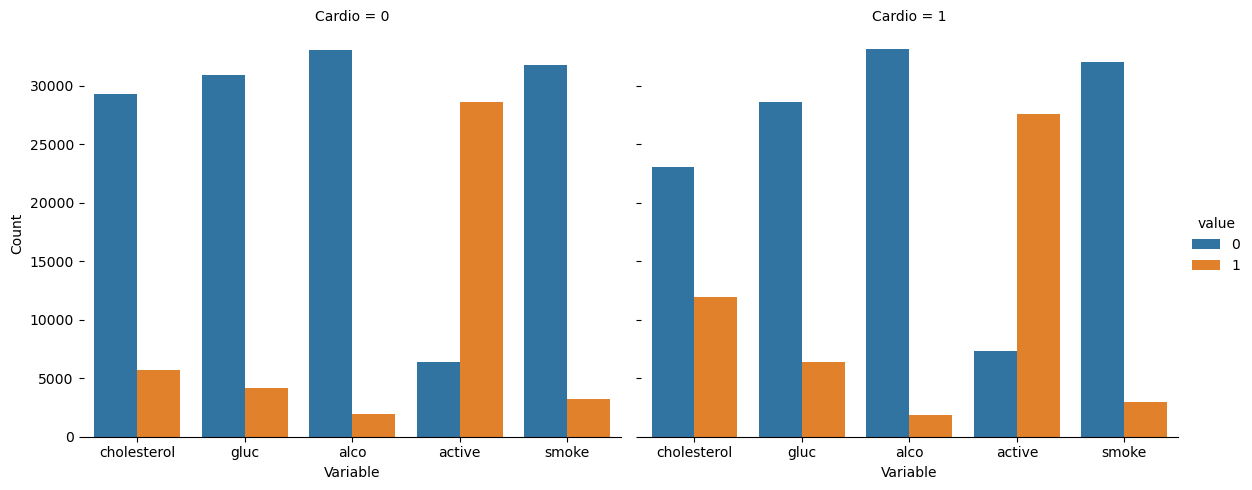

In [8]:
g = sns.catplot(x='variable', hue='value', col='cardio', data=df_long, kind='count', height=5, aspect=1.2)
g.set_axis_labels("Variable", "Count")
g.set_titles("Cardio = {col_name}")
g.despine(left=True)
plt.show()

In [9]:
df['BMI'] = df['weight'] / ((df['height'] / 100) ** 2)
df['overweight'] = df['BMI'].apply(lambda x: 1 if x > 25 else 0)

In [10]:
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)


In [11]:
df_long = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'alco', 'active', 'smoke', 'overweight'])


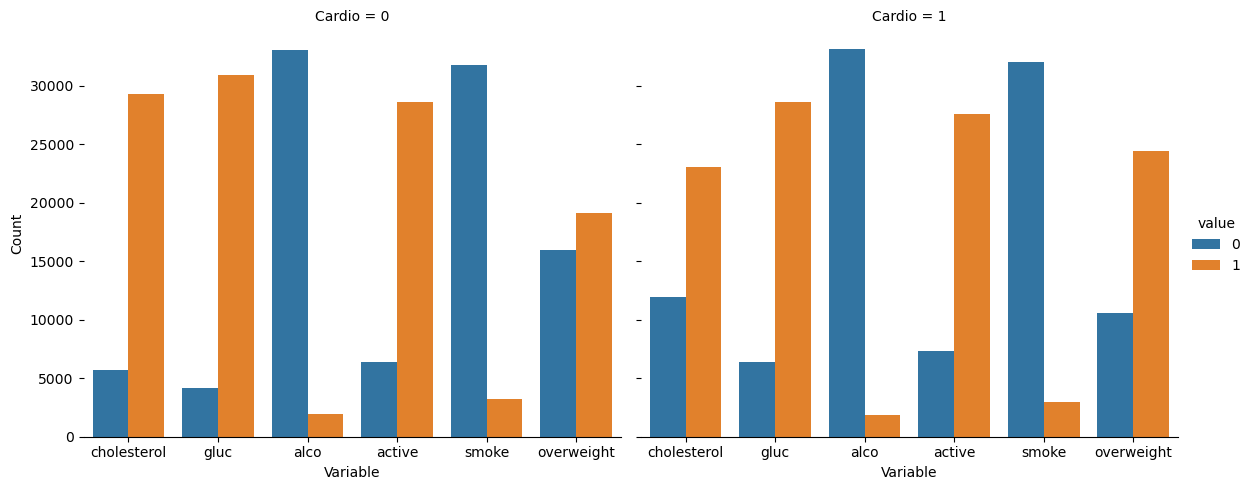

In [12]:
g = sns.catplot(x='variable', hue='value', col='cardio', data=df_long, kind='count', height=5, aspect=1.2)
g.set_axis_labels("Variable", "Count")
g.set_titles("Cardio = {col_name}")
g.despine(left=True)
plt.show()

In [13]:
df = df[(df['ap_lo'] <= df['ap_hi'])]
df = df[(df['height'] >= df['height'].quantile(0.025)) & (df['height'] <= df['height'].quantile(0.975))]
df = df[(df['weight'] >= df['weight'].quantile(0.025)) & (df['weight'] <= df['weight'].quantile(0.975))]

In [14]:
df_long = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'alco', 'active', 'smoke', 'overweight'])


In [15]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,0,1,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,0,1,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,1,1,0,0,1,1,23.661439,0
69994,99992,21074,1,165,80.0,150,80,1,1,0,0,1,1,29.384757,1
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,26.927438,1
69998,99998,22431,1,163,72.0,135,80,1,0,0,0,0,1,27.099251,1


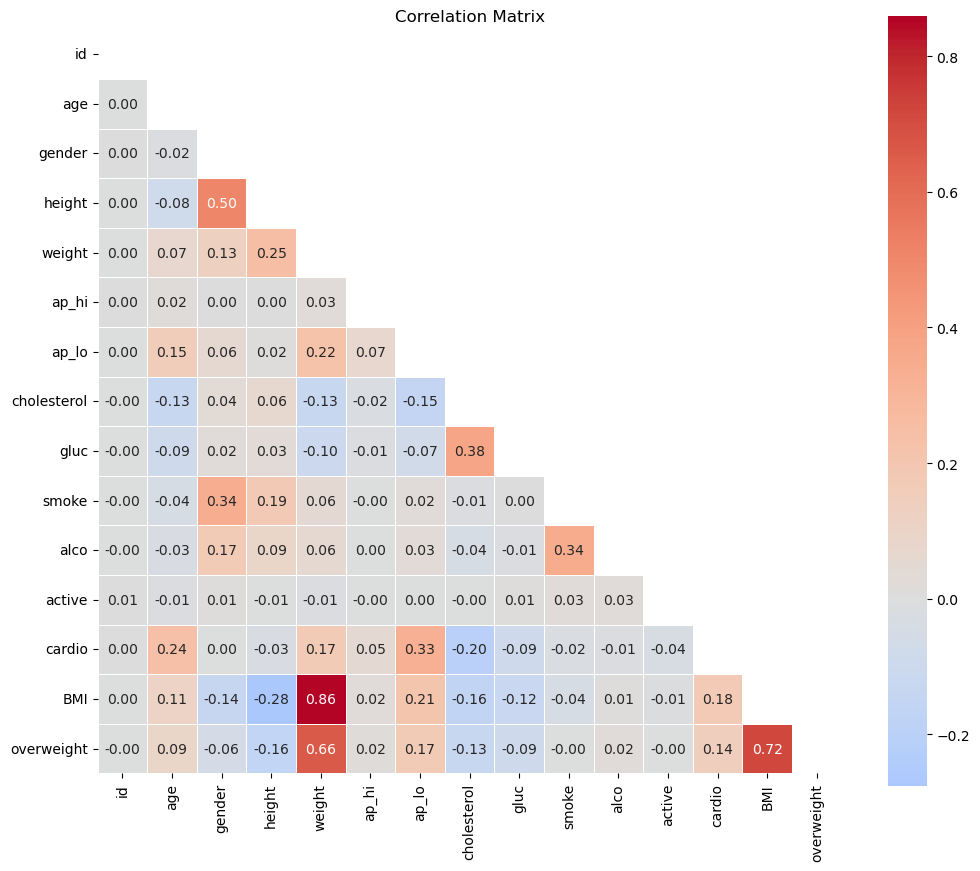

In [16]:
import numpy as np

corr_matrix = df.corr()

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix,mask=mask,  annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True, linewidths=.5, center=0)
plt.title('Correlation Matrix')
plt.show()
